<a href="https://colab.research.google.com/github/bangssbangg/nataliekarenina/blob/main/VaR_Historical_Method_H%E1%BA%A3i_B%C4%83ng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm


In [ ]:
years = 15
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)

In [ ]:
tickers = ['SPY','BND','GLD','QQQ','VTI']

In [ ]:
adj_close_df = pd.DataFrame()

for ticker in tickers:
    data =yf.download(ticker, start = startDate, end = endDate)
    adj_close_df[ticker] = data['Close']

adj_close_df.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2010-05-24,81.850906,52.525455,116.839996,38.992390,42.010765
2010-05-25,81.934479,52.538460,117.360001,39.027302,42.010765
2010-05-26,81.440536,52.473408,118.470001,38.590771,41.835121
2010-05-27,84.168648,52.271591,118.690002,40.048817,43.301430
2010-05-28,83.112350,52.375755,118.879997,39.813091,42.835556


In [ ]:
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns = log_returns.dropna()

print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2010-05-25  0.001021  0.000248  0.004441  0.000895  0.000000
2010-05-26 -0.006047 -0.001239  0.009414 -0.011248 -0.004190
2010-05-27  0.032949 -0.003853  0.001855  0.037086  0.034449
2010-05-28 -0.012629  0.001991  0.001599 -0.005903 -0.010817
2010-06-01 -0.016966  0.000798  0.008627 -0.009253 -0.020898
...              ...       ...       ...       ...       ...
2025-05-12  0.032513 -0.003451 -0.028596  0.039932  0.032909
2025-05-13  0.006582 -0.000415  0.004250  0.015126  0.006765
2025-05-14  0.001277 -0.003464 -0.021262  0.005975  0.000657
2025-05-15  0.004872  0.005399  0.015838  0.001098  0.004069
2025-05-16  0.006314  0.000690 -0.012161  0.004343  0.006825

[3769 rows x 5 columns]


Creat an equally weighted portforlio

In [ ]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


Calculate the historical portfolio returns

In [ ]:
historical_returns = (log_returns * weights).sum(axis=1)
print(historical_returns)

Date
2010-05-25    0.001321
2010-05-26   -0.002662
2010-05-27    0.020497
2010-05-28   -0.005152
2010-06-01   -0.007539
                ...   
2025-05-12    0.014662
2025-05-13    0.006462
2025-05-14   -0.003363
2025-05-15    0.006255
2025-05-16    0.001202
Length: 3769, dtype: float64


Find the X-day historical returns

In [ ]:
days = 5
range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2010-06-01    0.006466
2010-06-02    0.019716
2010-06-03    0.022734
2010-06-04   -0.016418
2010-06-07   -0.016282
                ...   
2025-05-12    0.016225
2025-05-13    0.021897
2025-05-14    0.018720
2025-05-15    0.025017
2025-05-16    0.025217
Length: 3765, dtype: float64


Specify a confidence interval and calculate the Value at Risk

In [ ]:
confidence_interval = 0.95
VaR = -np.percentile(range_returns, 100 - (confidence_interval*100))*portfolio_value
print(VaR)

24026.87208324584


Plot the results of the historical return

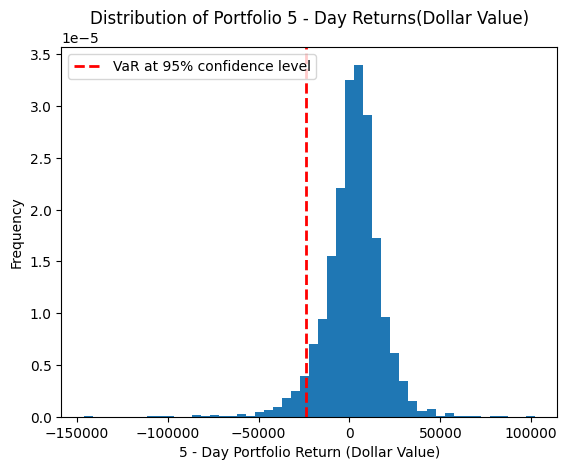

In [ ]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window} - Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window} - Day Returns(Dollar Value)')
plt.axvline(-VaR, color = 'r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()